In [47]:
from fibo import *

In [48]:
fibo_func(15)

[0, 1, 1, 2, 3, 5, 8, 13, 21]

In [38]:
# Pour afficher les graphiques dans la continuité du code, 
# et non pas dans une fenêtre à part:
%matplotlib inline

# Pour utiliser la fonction randint, qui génère des nombres
# entiers de façon aléatoire:
from random import randint, seed

# Un Enum est une structure de données qui consiste en un 
# ensemble d'éléments nommés. Une variable de ce type peut
# avoir comme valeur un de ces éléments.
from enum import Enum

# Pour pouvoir afficher des graphiques:
import matplotlib.pyplot as plt

In [85]:
class Strategie(Enum):
    RANDOM=2
    CHANGER=1
    GARDER=0

In [86]:
def play_game(strategie):
    
    portes=[0,1,2]
    
    bonne_porte=randint(0,2) #voiture
    
    premier_choix=randint(0,2)
    
    portes.remove(premier_choix) #l'animateur va supprimer une porte parmi les deux portes restantes
    
    if premier_choix==bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes=[bonne_porte]
    
    deuxieme_choix=0 #choix après suppression d'une porte
    
    if strategie==Strategie.GARDER:
        deuxieme_choix=premier_choix
    elif strategie==Strategie.CHANGER:
        deuxieme_choix=portes[0] #si CHANGER alors le 2e choix est la seule porte restante
    elif strategie==Strategie.RANDOM:
        tirage=randint(0,1)
        if tirage==0:
            deuxieme_choix=premier_choix
        else:
            deuxieme_choix=portes[0]
    
    return deuxieme_choix==bonne_porte

In [87]:
play_game(Strategie.RANDOM)

False

In [88]:
def play(strategie, nb_tours):
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

In [89]:
sum(play(Strategie.GARDER,1000))

337

In [90]:
sum(play(Strategie.CHANGER,1000))

668

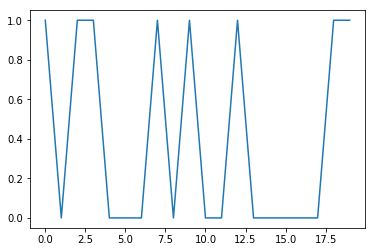

In [91]:
plt.plot(play(Strategie.GARDER,20))

<BarContainer object of 3 artists>

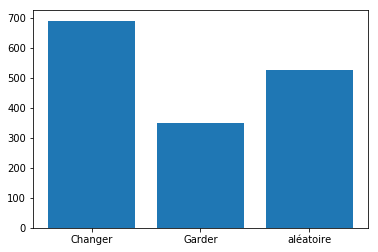

In [92]:
plt.bar([1,2,3],[sum(play(Strategie.CHANGER,1000)),sum(play(Strategie.GARDER,1000)),sum(play(Strategie.RANDOM,1000))], tick_label=["Changer","Garder","aléatoire"])

In [94]:
gains_changer=[]
gains_garder=[]
gains_random=[]
dataPoints=[1000,3000,5000,10000,20000,30000]
for tours in dataPoints:
    gains_changer.append(sum(play(Strategie.CHANGER,tours)))
    gains_garder.append(sum(play(Strategie.GARDER,tours)))
    gains_random.append(sum(play(Strategie.RANDOM,tours)))

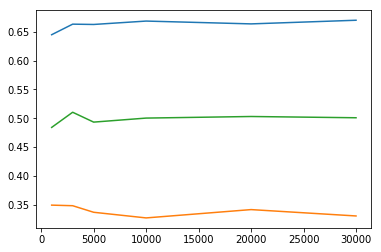

In [95]:
figure=plt.figure()#have one figure for both graph
plt.plot(dataPoints,[gains_changer[x]/dataPoints[x] for x in range(len(dataPoints))])
plt.plot(dataPoints,[gains_garder[x]/dataPoints[x] for x in range(len(dataPoints))])
plt.plot(dataPoints,[gains_random[x]/dataPoints[x] for x in range(len(dataPoints))])